In [1]:
import numpy as np
from playsound import playsound
from matplotlib import pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

from scipy.signal import lfilter
from scipy.signal import gammatone
from scipy.signal import freqz


playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
playsound('speech.wav')

samplerate, data = wavfile.read('speech.wav')

print('sample rate:', samplerate)

sample rate: 16000


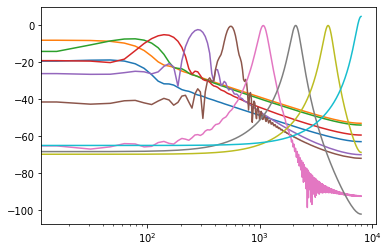

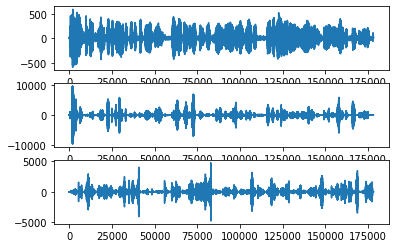

In [4]:
# time window the signal

# relate b to numtaps and ERB - CF/F is roughly constant, maybe that's what this is doing - plot all the filters

# calculate best way to make fixed interval spacing
# up to 8000 due to nyquist limit
fc = np.logspace(np.log10(20),np.log10(7900), num = 10)

# numtaps which relates to bandwidth is fs*0.015 if fs is greater than 1000, 
# 15 if fs is less than or equal to 1000. So it gets broad below 1000. 
# Related to minimum bandwidth in the Slaney ERB equation?

# how to make this more efficient?
a_s = [None]
b_s = [None]
filtered = np.empty((len(fc), len(data)))

fig,ax = plt.subplots()
# Do you need i if you're using append?
for i in range(len(fc)):
    b,a = gammatone(fc[i], 'fir', fs = samplerate)
    b_s.append(list(b))
    a_s.append(list(a))
    w, h = freqz(b, a)
    ax.plot(w / ((2 * np.pi) / 16000), 20 * np.log10(abs(h)))
    filtered_x = lfilter(b,a,data)
    filtered[i,:] = filtered_x

ax.set_xscale('log')
plt.show()

fig2,ax2 = plt.subplots(3,1)
ax2[0].plot(filtered[2])
ax2[1].plot(filtered[5])
ax2[2].plot(filtered[8])

#Audio(filtered[2], rate=samplerate)
#Audio(filtered[5], rate=samplerate)
Audio(filtered[8], rate=samplerate)

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://docs.twoears.eu/en/latest/_images/Gammatone.png")
